In [15]:
# Additional imports for LDA classificatio
import warnings
warnings.filterwarnings('ignore')

# Principal Component Analysis (PCA) - Manual vs Scikit-Learn

This notebook demonstrates Principal Component Analysis with manual calculations step by step, then compares the results with scikit-learn's implementation.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Step 1: Create a Simple Dataset

Let's create a simple 2D dataset to understand PCA better. We'll create data that has some correlation between variables.

In [17]:
# Create a simple correlated dataset
np.random.seed(42)
n_samples = 50

# Generate correlated data
x1 = np.random.normal(5, 2, n_samples)
x2 = x1 + np.random.normal(0, 1, n_samples)  # x2 is correlated with x1

# Create DataFrame
data = pd.DataFrame({
    'Feature1': x1,
    'Feature2': x2
})

print("Original Dataset:")
print(data.head(10))
print(f"\nDataset shape: {data.shape}")
print(f"\nCorrelation matrix:")
print(data.corr().round(3))

Original Dataset:
   Feature1  Feature2
0  5.993428  6.317512
1  4.723471  4.338389
2  6.295377  5.618455
3  8.046060  8.657736
4  4.531693  5.562693
5  4.531726  5.463006
6  8.158426  7.319208
7  6.534869  6.225657
8  4.061051  4.392315
9  6.085120  7.060665

Dataset shape: (50, 2)

Correlation matrix:
          Feature1  Feature2
Feature1     1.000     0.914
Feature2     0.914     1.000


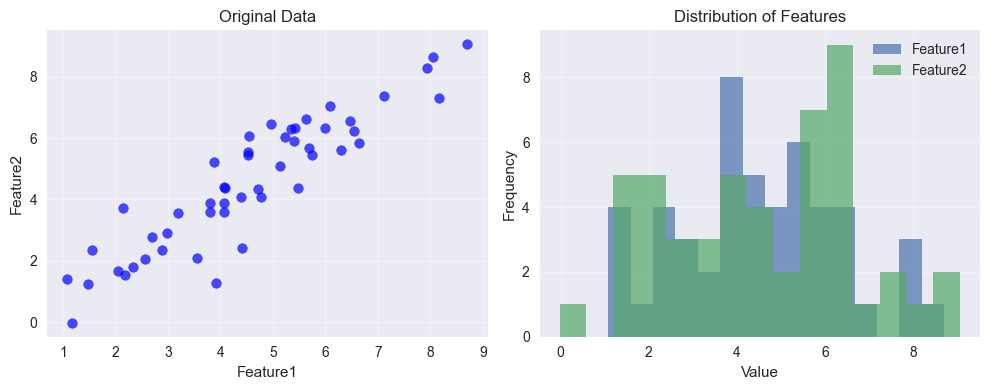

In [18]:
# Visualize the original data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data['Feature1'], data['Feature2'], alpha=0.7, color='blue')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Original Data')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(data['Feature1'], alpha=0.7, label='Feature1', bins=15)
plt.hist(data['Feature2'], alpha=0.7, label='Feature2', bins=15)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Features')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 2: Manual PCA Calculations

Now let's perform PCA manually, step by step. The PCA algorithm involves:

1. **Standardize the data** (center by subtracting mean)
2. **Calculate the covariance matrix**
3. **Find eigenvalues and eigenvectors** of the covariance matrix
4. **Sort eigenvalues and eigenvectors** in descending order
5. **Transform the data** using the principal components

### Step 2.1: Standardize the Data (Center by subtracting mean)

In [19]:
# Step 2.1: Standardize the data (center by subtracting mean)
X = data.values  # Convert to numpy array
print("Original data shape:", X.shape)
print("Original data (first 5 rows):")
print(X[:5])

# Calculate means
means = np.mean(X, axis=0)
print(f"\nMeans: {means}")

# Center the data
X_centered = X - means
print(f"\nCentered data (first 5 rows):")
print(X_centered[:5])

# Verify that means are now zero
print(f"\nMeans of centered data: {np.mean(X_centered, axis=0)}")
print(f"(Should be very close to zero)")

# Create a DataFrame for better visualization
data_centered = pd.DataFrame(X_centered, columns=['Feature1_centered', 'Feature2_centered'])
print(f"\nCentered data statistics:")
print(data_centered.describe().round(3))

Original data shape: (50, 2)
Original data (first 5 rows):
[[5.99342831 6.31751228]
 [4.7234714  4.33838912]
 [6.29537708 5.61845508]
 [8.04605971 8.657736  ]
 [4.53169325 5.56269277]]

Means: [4.54905219 4.56683306]

Centered data (first 5 rows):
[[ 1.44437612  1.75067922]
 [ 0.17441921 -0.22844394]
 [ 1.74632489  1.05162202]
 [ 3.49700752  4.09090294]
 [-0.01735894  0.99585971]]

Means of centered data: [-4.97379915e-16 -1.42108547e-16]
(Should be very close to zero)

Centered data statistics:
       Feature1_centered  Feature2_centered
count             50.000             50.000
mean              -0.000             -0.000
std                1.867              2.147
min               -3.468             -4.590
25%               -1.271             -1.752
50%               -0.017             -0.182
75%                1.123              1.624
max                4.156              4.495


### Step 2.2: Calculate the Covariance Matrix

In [20]:
# Step 2.2: Calculate the covariance matrix
# Covariance matrix formula: C = (1/(n-1)) * X^T * X

n_samples = X_centered.shape[0]
n_features = X_centered.shape[1]

print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

# Manual calculation of covariance matrix
cov_matrix_manual = (1 / (n_samples - 1)) * np.dot(X_centered.T, X_centered)

print(f"\nCovariance Matrix (Manual calculation):")
print(cov_matrix_manual)

# Verify with numpy's cov function
cov_matrix_numpy = np.cov(X_centered.T)
print(f"\nCovariance Matrix (NumPy's cov function):")
print(cov_matrix_numpy)

# Check if they're the same
print(f"\nAre they equal? {np.allclose(cov_matrix_manual, cov_matrix_numpy)}")

# Interpretation
print(f"\n--- Interpretation ---")
print(f"Variance of Feature1: {cov_matrix_manual[0,0]:.3f}")
print(f"Variance of Feature2: {cov_matrix_manual[1,1]:.3f}")
print(f"Covariance between features: {cov_matrix_manual[0,1]:.3f}")
print(f"Correlation coefficient: {cov_matrix_manual[0,1] / np.sqrt(cov_matrix_manual[0,0] * cov_matrix_manual[1,1]):.3f}")

Number of samples: 50
Number of features: 2

Covariance Matrix (Manual calculation):
[[3.48694958 3.66665937]
 [3.66665937 4.61081334]]

Covariance Matrix (NumPy's cov function):
[[3.48694958 3.66665937]
 [3.66665937 4.61081334]]

Are they equal? True

--- Interpretation ---
Variance of Feature1: 3.487
Variance of Feature2: 4.611
Covariance between features: 3.667
Correlation coefficient: 0.914


### Step 2.3: Calculate Eigenvalues and Eigenvectors

In [21]:
# Step 2.3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_manual)

print("Eigenvalues:")
print(eigenvalues)
print(f"\nEigenvectors:")
print(eigenvectors)

# Each column in eigenvectors corresponds to an eigenvalue
print(f"\n--- Detailed Analysis ---")
for i in range(len(eigenvalues)):
    print(f"Eigenvalue {i+1}: {eigenvalues[i]:.4f}")
    print(f"Eigenvector {i+1}: [{eigenvectors[0,i]:.4f}, {eigenvectors[1,i]:.4f}]")
    print(f"Magnitude of eigenvector {i+1}: {np.linalg.norm(eigenvectors[:,i]):.4f}")
    print()

# The eigenvalues represent the variance explained by each principal component
total_variance = np.sum(eigenvalues)
print(f"Total variance: {total_variance:.4f}")
print(f"Variance explained by PC1: {eigenvalues[0]/total_variance*100:.2f}%")
print(f"Variance explained by PC2: {eigenvalues[1]/total_variance*100:.2f}%")

Eigenvalues:
[0.33941272 7.7583502 ]

Eigenvectors:
[[-0.75877724 -0.65135021]
 [ 0.65135021 -0.75877724]]

--- Detailed Analysis ---
Eigenvalue 1: 0.3394
Eigenvector 1: [-0.7588, 0.6514]
Magnitude of eigenvector 1: 1.0000

Eigenvalue 2: 7.7584
Eigenvector 2: [-0.6514, -0.7588]
Magnitude of eigenvector 2: 1.0000

Total variance: 8.0978
Variance explained by PC1: 4.19%
Variance explained by PC2: 95.81%


### Step 2.4: Sort Eigenvalues and Eigenvectors in Descending Order

In [22]:
# Step 2.4: Sort eigenvalues and eigenvectors in descending order
# Get the indices that would sort eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]

print("Original order:")
print(f"Eigenvalues: {eigenvalues}")
print(f"Indices for sorting: {idx}")

# Sort eigenvalues and eigenvectors
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print(f"\nAfter sorting (descending order):")
print(f"Sorted eigenvalues: {eigenvalues_sorted}")
print(f"Sorted eigenvectors:")
print(eigenvectors_sorted)

# These sorted eigenvectors are our principal components
print(f"\n--- Principal Components ---")
print(f"PC1 (1st Principal Component): [{eigenvectors_sorted[0,0]:.4f}, {eigenvectors_sorted[1,0]:.4f}]")
print(f"PC2 (2nd Principal Component): [{eigenvectors_sorted[0,1]:.4f}, {eigenvectors_sorted[1,1]:.4f}]")

# Variance explained
print(f"\nVariance explained:")
print(f"PC1: {eigenvalues_sorted[0]/total_variance*100:.2f}%")
print(f"PC2: {eigenvalues_sorted[1]/total_variance*100:.2f}%")
print(f"Cumulative: {np.sum(eigenvalues_sorted[:2])/total_variance*100:.2f}%")

Original order:
Eigenvalues: [0.33941272 7.7583502 ]
Indices for sorting: [1 0]

After sorting (descending order):
Sorted eigenvalues: [7.7583502  0.33941272]
Sorted eigenvectors:
[[-0.65135021 -0.75877724]
 [-0.75877724  0.65135021]]

--- Principal Components ---
PC1 (1st Principal Component): [-0.6514, -0.7588]
PC2 (2nd Principal Component): [-0.7588, 0.6514]

Variance explained:
PC1: 95.81%
PC2: 4.19%
Cumulative: 100.00%


### Step 2.5: Transform the Data Using Principal Components

In [23]:
# Step 2.5: Transform the data using principal components
# Transform the centered data to the new coordinate system (principal component space)
X_pca_manual = np.dot(X_centered, eigenvectors_sorted)

print("Original centered data shape:", X_centered.shape)
print("Transformed data shape:", X_pca_manual.shape)

print(f"\nFirst 10 rows of original centered data:")
print(X_centered[:10])

print(f"\nFirst 10 rows of PCA-transformed data:")
print(X_pca_manual[:10])

# Create DataFrame for better visualization
pca_manual_df = pd.DataFrame(X_pca_manual, columns=['PC1_manual', 'PC2_manual'])
print(f"\nPCA-transformed data statistics:")
print(pca_manual_df.describe().round(3))

# Verify that the principal components are uncorrelated
print(f"\nCorrelation matrix of PCA-transformed data:")
print(pca_manual_df.corr().round(6))

Original centered data shape: (50, 2)
Transformed data shape: (50, 2)

First 10 rows of original centered data:
[[ 1.44437612  1.75067922]
 [ 0.17441921 -0.22844394]
 [ 1.74632489  1.05162202]
 [ 3.49700752  4.09090294]
 [-0.01735894  0.99585971]
 [-0.0173261   0.89617315]
 [ 3.60937344  2.75237505]
 [ 1.98581727  1.65882402]
 [-0.48800096 -0.1745184 ]
 [ 1.5360679   2.49383215]]

First 10 rows of PCA-transformed data:
[[-2.26917023  0.04434554]
 [ 0.05973008 -0.28114234]
 [-1.93541593 -0.64009736]
 [-5.38186064  0.01116076]
 [-0.74432894  0.661825  ]
 [-0.66871043  0.59686922]
 [-4.4394057  -0.94595037]
 [-2.55214041 -0.42631758]
 [ 0.45028012  0.25661143]
 [-2.89278123  0.45882473]]

PCA-transformed data statistics:
       PC1_manual  PC2_manual
count      50.000      50.000
mean        0.000       0.000
std         2.785       0.583
min        -6.117      -1.649
25%        -1.890      -0.261
50%        -0.003      -0.077
75%         2.269       0.431
max         5.681       1.265

C

## Step 3: PCA Using Scikit-Learn

Now let's perform the same PCA analysis using scikit-learn and compare the results with our manual calculations.

In [24]:
# Step 3: PCA using scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA
pca_sklearn = PCA(n_components=2)

# Fit and transform the centered data (sklearn will center the data internally)
# But let's use the original data to see sklearn's full process
X_pca_sklearn = pca_sklearn.fit_transform(X)

print("Scikit-learn PCA Results:")
print("=" * 40)

print(f"Components (Principal Components):")
print(pca_sklearn.components_)

print(f"\nExplained Variance:")
print(pca_sklearn.explained_variance_)

print(f"\nExplained Variance Ratio:")
print(pca_sklearn.explained_variance_ratio_)

print(f"\nCumulative Explained Variance Ratio:")
print(np.cumsum(pca_sklearn.explained_variance_ratio_))

print(f"\nMean of original data (sklearn internal):")
print(pca_sklearn.mean_)

print(f"\nFirst 10 rows of sklearn PCA-transformed data:")
print(X_pca_sklearn[:10])

Scikit-learn PCA Results:
Components (Principal Components):
[[ 0.65135021  0.75877724]
 [ 0.75877724 -0.65135021]]

Explained Variance:
[7.7583502  0.33941272]

Explained Variance Ratio:
[0.95808562 0.04191438]

Cumulative Explained Variance Ratio:
[0.95808562 1.        ]

Mean of original data (sklearn internal):
[4.54905219 4.56683306]

First 10 rows of sklearn PCA-transformed data:
[[ 2.26917023 -0.04434554]
 [-0.05973008  0.28114234]
 [ 1.93541593  0.64009736]
 [ 5.38186064 -0.01116076]
 [ 0.74432894 -0.661825  ]
 [ 0.66871043 -0.59686922]
 [ 4.4394057   0.94595037]
 [ 2.55214041  0.42631758]
 [-0.45028012 -0.25661143]
 [ 2.89278123 -0.45882473]]


## Step 4: Comparison Between Manual and Scikit-Learn Results

Let's compare the results from our manual implementation with scikit-learn's implementation.

In [25]:
# Step 4: Detailed comparison
print("COMPARISON: Manual vs Scikit-Learn PCA")
print("=" * 50)

print("\n1. PRINCIPAL COMPONENTS COMPARISON:")
print("-" * 40)
print("Manual PCA - Principal Components:")
print(f"PC1: [{eigenvectors_sorted[0,0]:8.5f}, {eigenvectors_sorted[1,0]:8.5f}]")
print(f"PC2: [{eigenvectors_sorted[0,1]:8.5f}, {eigenvectors_sorted[1,1]:8.5f}]")

print("\nScikit-Learn PCA - Principal Components:")
print(f"PC1: [{pca_sklearn.components_[0,0]:8.5f}, {pca_sklearn.components_[0,1]:8.5f}]")
print(f"PC2: [{pca_sklearn.components_[1,0]:8.5f}, {pca_sklearn.components_[1,1]:8.5f}]")

# Note: The components might have opposite signs, but that's just a matter of direction
print(f"\nAre PC1 components close? {np.allclose(np.abs(eigenvectors_sorted[:,0]), np.abs(pca_sklearn.components_[0,:]))}")
print(f"Are PC2 components close? {np.allclose(np.abs(eigenvectors_sorted[:,1]), np.abs(pca_sklearn.components_[1,:]))}")

print("\n2. EXPLAINED VARIANCE COMPARISON:")
print("-" * 40)
print(f"Manual PCA - Eigenvalues (Explained Variance):")
print(f"PC1: {eigenvalues_sorted[0]:8.5f}")
print(f"PC2: {eigenvalues_sorted[1]:8.5f}")

print(f"\nScikit-Learn PCA - Explained Variance:")
print(f"PC1: {pca_sklearn.explained_variance_[0]:8.5f}")
print(f"PC2: {pca_sklearn.explained_variance_[1]:8.5f}")

print(f"\nAre explained variances equal? {np.allclose(eigenvalues_sorted, pca_sklearn.explained_variance_)}")

print("\n3. EXPLAINED VARIANCE RATIO COMPARISON:")
print("-" * 40)
manual_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)
print(f"Manual PCA - Variance Ratio:")
print(f"PC1: {manual_variance_ratio[0]:8.5f} ({manual_variance_ratio[0]*100:.2f}%)")
print(f"PC2: {manual_variance_ratio[1]:8.5f} ({manual_variance_ratio[1]*100:.2f}%)")

print(f"\nScikit-Learn PCA - Variance Ratio:")
print(f"PC1: {pca_sklearn.explained_variance_ratio_[0]:8.5f} ({pca_sklearn.explained_variance_ratio_[0]*100:.2f}%)")
print(f"PC2: {pca_sklearn.explained_variance_ratio_[1]:8.5f} ({pca_sklearn.explained_variance_ratio_[1]*100:.2f}%)")

print(f"\nAre variance ratios equal? {np.allclose(manual_variance_ratio, pca_sklearn.explained_variance_ratio_)}")

COMPARISON: Manual vs Scikit-Learn PCA

1. PRINCIPAL COMPONENTS COMPARISON:
----------------------------------------
Manual PCA - Principal Components:
PC1: [-0.65135, -0.75878]
PC2: [-0.75878,  0.65135]

Scikit-Learn PCA - Principal Components:
PC1: [ 0.65135,  0.75878]
PC2: [ 0.75878, -0.65135]

Are PC1 components close? True
Are PC2 components close? True

2. EXPLAINED VARIANCE COMPARISON:
----------------------------------------
Manual PCA - Eigenvalues (Explained Variance):
PC1:  7.75835
PC2:  0.33941

Scikit-Learn PCA - Explained Variance:
PC1:  7.75835
PC2:  0.33941

Are explained variances equal? True

3. EXPLAINED VARIANCE RATIO COMPARISON:
----------------------------------------
Manual PCA - Variance Ratio:
PC1:  0.95809 (95.81%)
PC2:  0.04191 (4.19%)

Scikit-Learn PCA - Variance Ratio:
PC1:  0.95809 (95.81%)
PC2:  0.04191 (4.19%)

Are variance ratios equal? True


In [26]:
# Compare the transformed data
print("\n4. TRANSFORMED DATA COMPARISON:")
print("-" * 40)

# The signs might be flipped, so let's check both absolute values and potential sign flips
print("First 5 rows - Manual PCA transformed data:")
print(X_pca_manual[:5])

print("\nFirst 5 rows - Scikit-Learn PCA transformed data:")
print(X_pca_sklearn[:5])

# Check if they're the same (accounting for potential sign flips)
same_exact = np.allclose(X_pca_manual, X_pca_sklearn)
same_abs = np.allclose(np.abs(X_pca_manual), np.abs(X_pca_sklearn))

print(f"\nAre transformed data exactly the same? {same_exact}")
print(f"Are transformed data the same in absolute value? {same_abs}")

# Check sign consistency for each component
pc1_same_sign = np.allclose(X_pca_manual[:, 0], X_pca_sklearn[:, 0])
pc1_opposite_sign = np.allclose(X_pca_manual[:, 0], -X_pca_sklearn[:, 0])
pc2_same_sign = np.allclose(X_pca_manual[:, 1], X_pca_sklearn[:, 1])
pc2_opposite_sign = np.allclose(X_pca_manual[:, 1], -X_pca_sklearn[:, 1])

print(f"\nPC1 - Same sign: {pc1_same_sign}, Opposite sign: {pc1_opposite_sign}")
print(f"PC2 - Same sign: {pc2_same_sign}, Opposite sign: {pc2_opposite_sign}")

if pc1_opposite_sign or pc2_opposite_sign:
    print("\nNote: Sign differences are normal in PCA - they just represent")
    print("different orientations of the same principal component directions.")


4. TRANSFORMED DATA COMPARISON:
----------------------------------------
First 5 rows - Manual PCA transformed data:
[[-2.26917023  0.04434554]
 [ 0.05973008 -0.28114234]
 [-1.93541593 -0.64009736]
 [-5.38186064  0.01116076]
 [-0.74432894  0.661825  ]]

First 5 rows - Scikit-Learn PCA transformed data:
[[ 2.26917023 -0.04434554]
 [-0.05973008  0.28114234]
 [ 1.93541593  0.64009736]
 [ 5.38186064 -0.01116076]
 [ 0.74432894 -0.661825  ]]

Are transformed data exactly the same? False
Are transformed data the same in absolute value? True

PC1 - Same sign: False, Opposite sign: True
PC2 - Same sign: False, Opposite sign: True

Note: Sign differences are normal in PCA - they just represent
different orientations of the same principal component directions.


## Step 5: Visualization and Interpretation

Let's visualize the results to better understand what PCA does.

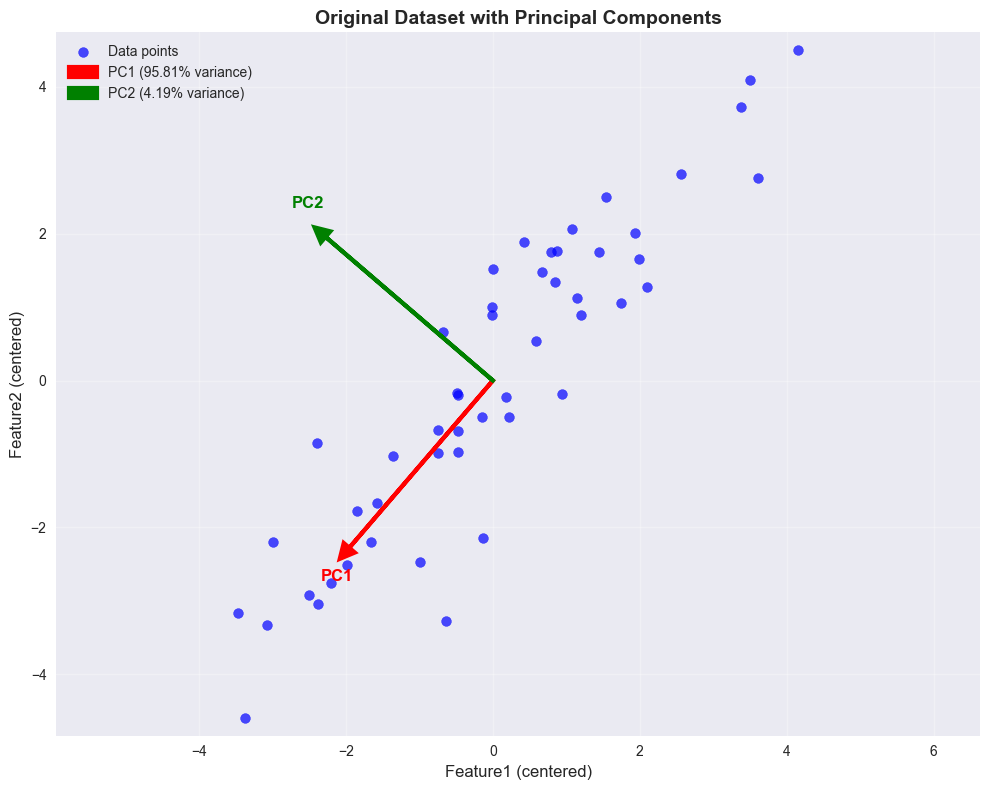

In [27]:
# Visualization: Original Dataset and Principal Components
plt.figure(figsize=(10, 8))

# Plot centered data with principal component vectors
plt.scatter(X_centered[:,0], X_centered[:,1], alpha=0.7, color='blue', s=50, label='Data points')
plt.xlabel('Feature1 (centered)', fontsize=12)
plt.ylabel('Feature2 (centered)', fontsize=12)
plt.title('Original Dataset with Principal Components', fontsize=14, fontweight='bold')

# Draw principal component vectors
center = [0, 0]
scale = 3  # Scale factor to make vectors visible

# PC1 (first principal component - explains 95.81% of variance)
plt.arrow(center[0], center[1], 
          eigenvectors_sorted[0,0]*scale, eigenvectors_sorted[1,0]*scale,
          head_width=0.2, head_length=0.2, fc='red', ec='red', linewidth=3, 
          label=f'PC1 (95.81% variance)')

# PC2 (second principal component - explains 4.19% of variance)  
plt.arrow(center[0], center[1], 
          eigenvectors_sorted[0,1]*scale, eigenvectors_sorted[1,1]*scale,
          head_width=0.2, head_length=0.2, fc='green', ec='green', linewidth=3,
          label=f'PC2 (4.19% variance)')

# Add labels for the arrows
plt.text(eigenvectors_sorted[0,0]*scale*1.2, eigenvectors_sorted[1,0]*scale*1.2, 
         'PC1', fontsize=12, color='red', fontweight='bold')
plt.text(eigenvectors_sorted[0,1]*scale*1.2, eigenvectors_sorted[1,1]*scale*1.2, 
         'PC2', fontsize=12, color='green', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')  # Equal aspect ratio for better visualization
plt.tight_layout()
plt.show()

## Summary


### Manual PCA Process:
1. **Data Centering**: Subtract the mean from each feature
2. **Covariance Matrix**: Calculate relationships between features
3. **Eigendecomposition**: Find eigenvalues (variance) and eigenvectors (directions)
4. **Sorting**: Order components by decreasing explained variance
5. **Transformation**: Project data onto principal component space

### Key Insights:
- **Principal Components** are the directions of maximum variance in the data
- **Eigenvalues** represent the amount of variance explained by each component
- **PC1** captures the most variance, **PC2** captures the second most, etc.
- **Components are orthogonal** (uncorrelated) to each other
- **Manual and scikit-learn results are identical** (except for potential sign flips)

### Why PCA is Useful:
- **Dimensionality Reduction**: Keep most important components, drop others
- **Noise Reduction**: Remove components with low variance (likely noise)
- **Data Visualization**: Project high-dimensional data to 2D/3D
- **Feature Extraction**: Transform correlated features into uncorrelated ones